In [340]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

- 2013년이후 전국 아파트분양가격
- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [184]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})  # 그래프 사이즈 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면
# from matplotlib.font_manager import FontProperties
# font_path = 'C:/Windows/Fonts/HMFMPYUN.TTF'
# font_prop = FontProperties(fname=font_path, size=10)
# plt.rc('font', family=font_prop.get_name())      # 내가 지정한 폰트를 기본 글꼴로 설정

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [106]:
df_first = pd.read_csv('C:/AI/downloads/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')      #경로에 역슬래시 쓰려면 
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [107]:
df_first.shape   # 데이터프레임 사이즈 확인

(17, 22)

In [108]:
pd.options.display.max_columns=22   # 최대 display가능한 열수 수정
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [109]:
# 결측치 확인
df_first.info()   # 열별 데이터 타입, 결측치 갯수, 데이터 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [110]:
df_first.isna().sum()   # 열별 결측치 갯수

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [112]:
df_first_heat = df_first.set_index('지역')  # 히트맵 만들기 위해 지역열값을 인덱스로 
df_first_heat.sample(1)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


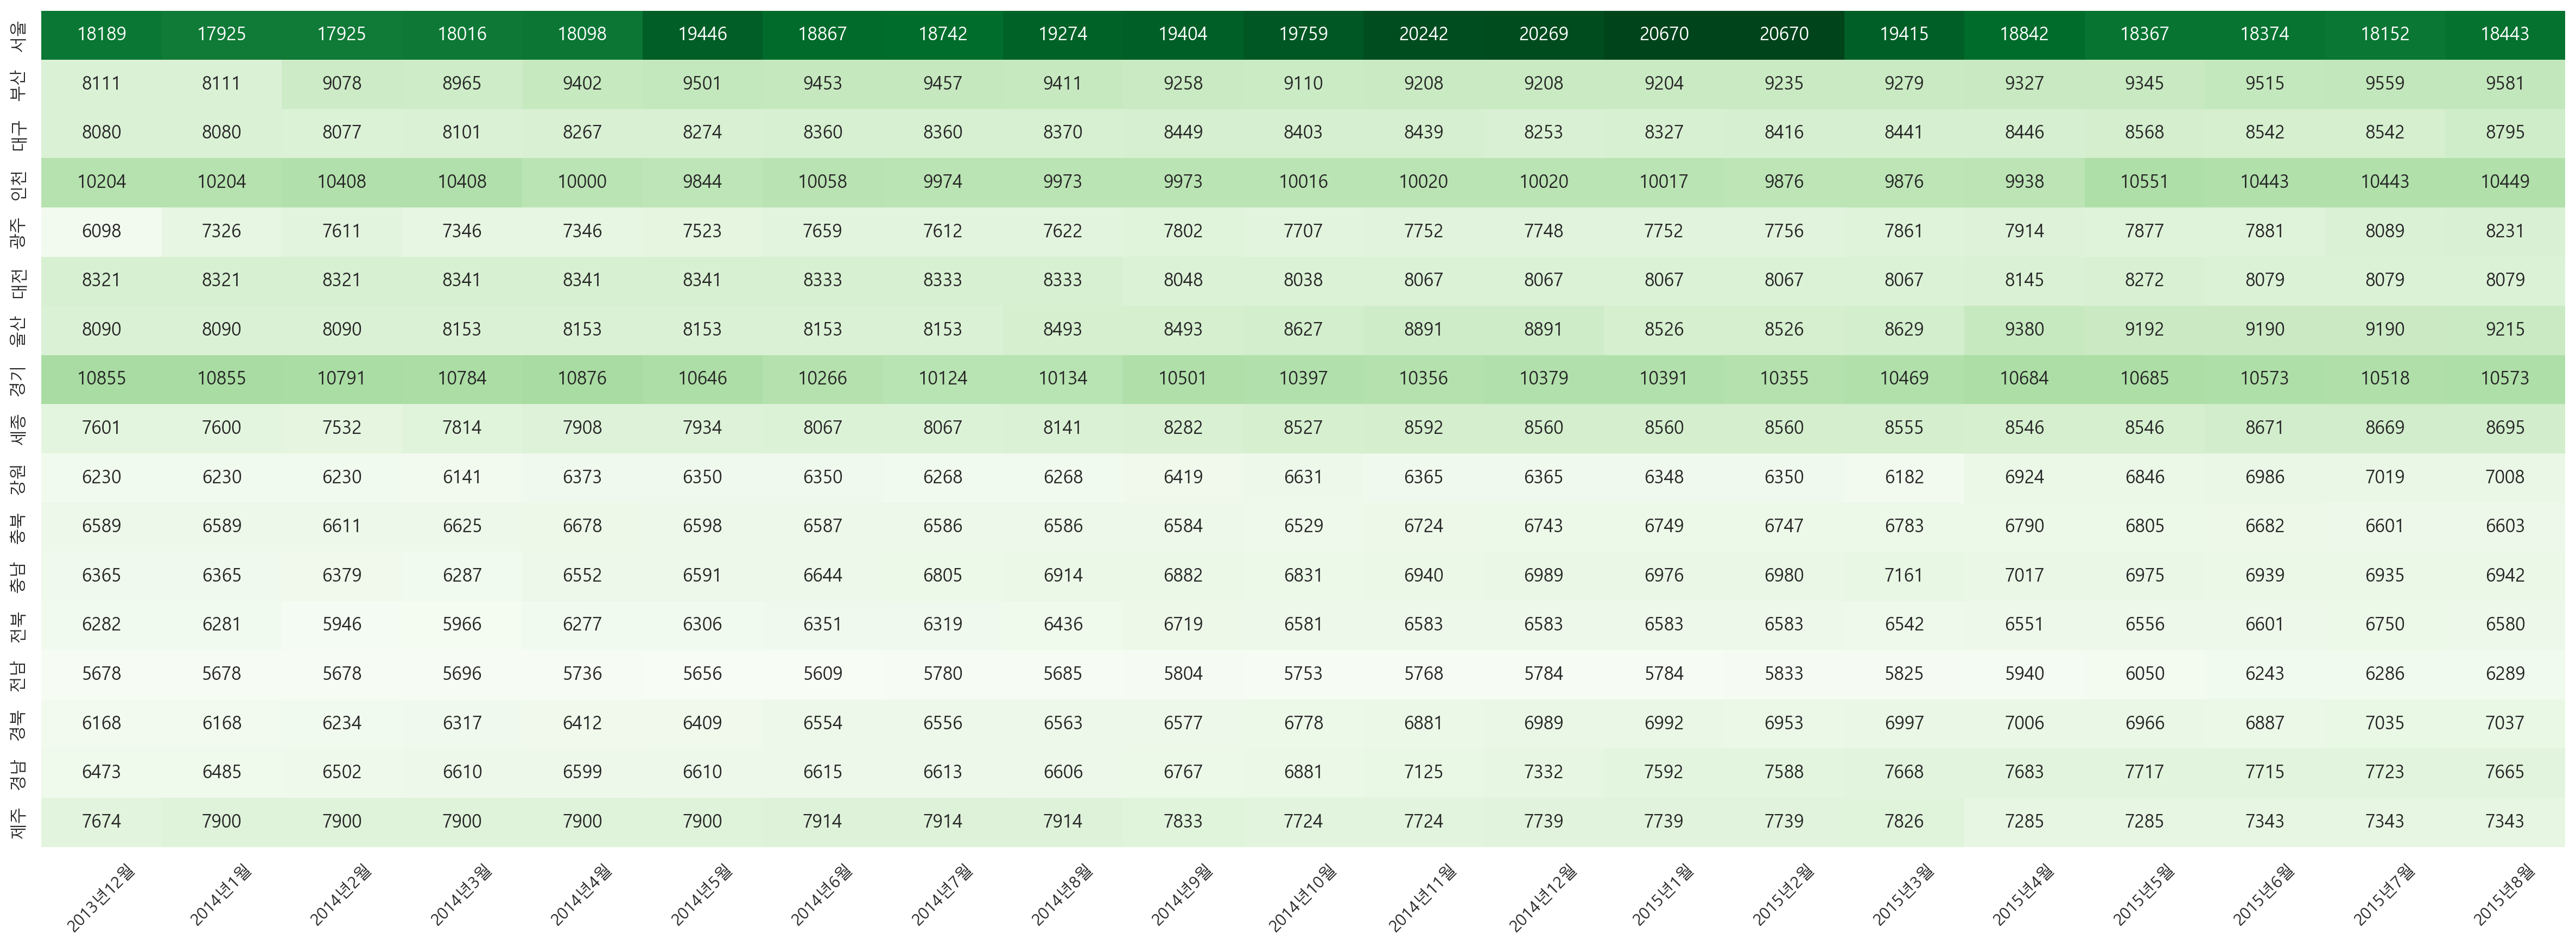

In [342]:
plt.figure(figsize=(30,10))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
#                                   숫자를 정수로, 그린색, 오른쪽 바 없애기
plt.xticks(rotation=45)
plt.ylabel(None)
plt.show()

## (2) 이후 데이터는 df_last 변수에 담아 탐색

In [343]:
df_last = pd.read_csv('C:/AI/downloads/shareData/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                     encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [344]:
# 데이터 요약하기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [345]:
# 열별 결측치 갯수
df_last.isnull().sum()
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [346]:
# 열별 결측치를 제외한 갯수
df_last.notnull().sum()
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

In [347]:
# '분양가격(제곱미터)' 컬럼의 결측치 갯수와 결측치가 아닌 갯수, 전체 데이터 수
print('전체 갯수 :', len(df_last['분양가격(제곱미터)']), df_last.shape[0])
print('결측치가 아닌 갯수', df_last ['분양가격(제곱미터)'].notnull().sum())
print('결측치가 아닌 갯수', df_last ['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수', df_last ['분양가격(제곱미터)'].isnull().sum())
print('결측치 갯수', df_last ['분양가격(제곱미터)'].isna().sum())

전체 갯수 : 9095 9095
결측치가 아닌 갯수 8481
결측치가 아닌 갯수 8481
결측치 갯수 614
결측치 갯수 614


# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [350]:
df_last.loc[0, '분양가격(제곱미터)']  # 분양가격의 타입이 Object라 연산이나 groupby 안된다.

'5841'

In [351]:
# df_last.groupby('지역명')['분양가격(제곱미터)'].mean()  # error
# df_last['분양가격(제곱미터)'] * 3.3   # error

In [352]:
# df_last['분양가격(제곱미터)'].astype('float') # '5184'->5184.0 하고 싶은데 ' ', '6,244'때문에 error
# pd.to_numeric?
# 숫자로 변경시 예외발생되면 예외 발생 말고 NaN으로
pd.to_numeric(df_last['분양가격(제곱미터)'],
              errors='coerce').isna().sum()   # 원래 결측치 갯수(614)

744

In [353]:
# 분양가격에 space가 있는 경우 :  28, 29, 34, ...
df_last[df_last['분양가격(제곱미터)'].str.strip()==''].shape

(126, 5)

In [354]:
df_last.loc[df_last['분양가격(제곱미터)'].str.strip()=='',
            '지역명'].value_counts()

세종    30
제주    19
대구    19
광주    12
전남    11
대전    10
울산    10
전북     8
경남     5
서울     2
Name: 지역명, dtype: int64

In [355]:
# 분양가격에 ,가 있는 경우
df_last[df_last['분양가격(제곱미터)'].notnull() &
       (df_last['분양가격(제곱미터)'].str.find(',')!=-1)]

,지역명,규모구분,연도,월,분양가격(제곱미터)
80,제주,모든면적,2015,10,"2,232"
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574"


### apply
- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [356]:
# 콤마가 있는 문자에서 콤마 없애기 방법1  시리즈 하나하나로 받는다는 전제하에
temp = '12,523'
temp.replace(',','')


'12523'

In [357]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited = temp.split(',')
''.join(tempsplited)

'12523'

In [358]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123'/ '5123' -> 5123)
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    row = row.copy()  # 안하면 warning
    price = row['분양가격(제곱미터)']
    # print(price)
    # price가 결측치냐? price(스칼라데이터)가 결측치인지 여부
        # (1) price is np.nan: 값의 타입에 상관없이 nan인지 여부    /price == np.nan(X 이런방식쓰지마!!): 
        # (2) pd.isna(price), pd.isnull(값) : 값의 타입에 상관없이 nan인지 여부
        # (3) np.isnan(숫자데이터): 값이 숫자가 아닐 경우 에러. 숫자일 경우 nan인지 여부        
    if price is np.nan:   # 결측치 이면
        pass             # row['분양가격(제곱미터)'] = np
    elif price.strip() == '':   # space면 결측치로
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',') != -1: # 콤마(,)가 있으면 ,없애고 float으로 형변환
        pricesplited = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplited))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row

commadrop(df_last.loc[80]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
Name: 368, dtype: object

In [359]:
# [공백문자는 결측치로, 콤마는 제거하기]를 모든 행에 적용, 한줄씩
df_last.apply(commadrop, axis=1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [360]:
df_last.apply(commadrop, axis=1).isna().sum()  # 적용된 갯수

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    740
dtype: int64

### map

In [361]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        pricesplited = price.split(',')
        return float(''.join(pricesplited))
    else:
        return float(price)

commadrop2(df_last.loc[80, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [362]:
df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['분양가격(제곱미터)'].map(commadrop2)

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

### apply나 map사용 안 하기

In [363]:
pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',','')).isna().sum()   
                                            # 공백과 , 없애고, replace()는 문자열의 함수사용

740

In [364]:
df_last['분양가격(제곱미터)'] = \
        pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))

In [365]:
# 80(콤마있었던 행), 28(공백문자), 368(결측치)
df_last.loc[80]
df_last.loc[28]
df_last.loc[368]
df_last.loc[1]

지역명                      서울
규모구분          전용면적 60제곱미터이하
연도                     2015
월                        10
분양가격(제곱미터)           5652.0
Name: 1, dtype: object

In [366]:
df_last.info()   # 분양가격(제곱미터)  8355 non-null   float64  확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [367]:
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3
df_last.info()                          #  5   평당분양가격      8355 non-null   float64 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


In [368]:
df_last['평당분양가격'].describe()

count     8355.000000
mean     13032.995512
std       5729.523419
min       6164.400000
25%       9038.700000
50%      11513.700000
75%      15034.800000
max      61917.900000
Name: 평당분양가격, dtype: float64

# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [369]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [370]:
df_last['규모구분']

0                          모든면적
1                 전용면적 60제곱미터이하
2        전용면적 60제곱미터초과 85제곱미터이하
3       전용면적 85제곱미터초과 102제곱미터이하
4                전용면적 102제곱미터초과
                 ...           
9090                       모든면적
9091              전용면적 60제곱미터이하
9092     전용면적 60제곱미터초과 85제곱미터이하
9093    전용면적 85제곱미터초과 102제곱미터이하
9094             전용면적 102제곱미터초과
Name: 규모구분, Length: 9095, dtype: object

In [371]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [372]:
# 전용면적,이하,' ' 없애기, 제곱미터 -> m²(alt+0178), 초과 -> ~
x = '전용면적 85제곱미터초과 102제곱미터이하'
# x.replace('전용면적','').replace('이하','').replace(' ','').replace('제곱미터')~
# 정규표현식으로 처리
import re
re.sub('전용면적|이하| ','', x).replace('제곱미터','m²').replace('초과','~')  # replace()하나씩 적용하면서 확인

'85m²~102m²'

In [373]:
# 방법1
df_last['전용면적'] = df_last['규모구분'].apply(lambda x:
                     re.sub('전용면적|이하| ','', x).replace('제곱미터','m²').replace('초과','~'))
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102m²~


In [374]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102m²~


In [375]:
# 방법2
df_last['전용면적'] = df_last['규모구분'].apply(lambda x: x.replace('전용면적','') )
df_last['전용면적'] = df_last['전용면적'].apply(lambda x: x.replace('제곱미터','m²') )                                        
df_last['전용면적'] = df_last['전용면적'].apply(lambda x: x.replace('초과','~'))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x: x.replace('이하',''))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x: x.replace(' ','')  )                        
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102m²~


In [376]:
# 방법3
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')\
                                       .str.replace('제곱미터','m²')\
                                       .str.replace('초과','~')\
                                       .str.replace('이하','')\
                                       .str.replace(' ','')          
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60m²
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60m²~85m²
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85m²~102m²
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102m²~


In [377]:
print(df_last['규모구분'].unique())
print(df_last['전용면적'].unique())

['모든면적' '전용면적 60제곱미터이하' '전용면적 60제곱미터초과 85제곱미터이하' '전용면적 85제곱미터초과 102제곱미터이하'
 '전용면적 102제곱미터초과']
['모든면적' '60m²' '60m²~85m²' '85m²~102m²' '102m²~']


# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [378]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
 6   전용면적        9095 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 497.5+ KB


In [379]:
df_last.drop(['규모구분','분양가격(제곱미터)'], axis=1, inplace=True)  # 열제거 -> 할당하거나 inplace=True해서 적용
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60m²
2,서울,2015,10,19410.6,60m²~85m²
3,서울,2015,10,18879.3,85m²~102m²
4,서울,2015,10,19400.7,102m²~
...,...,...,...,...,...
9090,제주,2024,8,25419.9,모든면적
9091,제주,2024,8,NaN,60m²
9092,제주,2024,8,24799.5,60m²~85m²
9093,제주,2024,8,NaN,85m²~102m²


In [380]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [381]:
# 컬럼 순서를 바꿔서 백업
# df_last[['지역명','전용면적','연도','월','평당분양가격']]
col = df_last.pop('전용면적')  # '전용면적'컬럼 빼서 col변수 할당
df_last.insert(1,'전용면적',col)    # 1번째 열에 col추가
df_last.head()

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60m²,2015,10,18651.6
2,서울,60m²~85m²,2015,10,19410.6
3,서울,85m²~102m²,2015,10,18879.3
4,서울,102m²~,2015,10,19400.7


In [382]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

In [397]:
df_last.to_csv('data/df_last.csv')
df_last.head()

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60m²,2015,10,18651.6
2,서울,60m²~85m²,2015,10,19410.6
3,서울,85m²~102m²,2015,10,18879.3
4,서울,102m²~,2015,10,19400.7


- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [398]:
# 지역별 데이터 수(결측치 포함)
df_last['지역명'].value_counts() # 정렬까지 된다. 

서울    535
강원    535
경남    535
경북    535
전남    535
전북    535
충남    535
충북    535
세종    535
인천    535
울산    535
대전    535
광주    535
대구    535
부산    535
경기    535
제주    535
Name: 지역명, dtype: int64

In [399]:
# 지역명별  데이터 행 갯수(결측치 제외) : 결과가 1차원 시리즈 - groupby 속도에 민감하다면 시리즈
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(
                            # ascending=False   내림차순
)

지역명
울산    395
세종    409
대전    415
제주    439
광주    450
대구    495
전남    507
경북    511
경남    516
충남    516
전북    520
강원    523
서울    527
인천    531
부산    533
충북    533
경기    535
Name: 평당분양가격, dtype: int64

In [400]:
# 지역명별  데이터 행 갯수(결측치 제외) : 결과가 2차원 데이터프레임 - groupby 가독성   #1과 #5를 많이 쓴다.
# 1
df_last.groupby(['지역명'])[['평당분양가격']].count().sort_values(
    by='평당분양가격',ascending=False
)
# 2
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(
                            # ascending=False   내림차순
).to_frame()
# 3
df_last.groupby(['지역명'])['평당분양가격'].count().reset_index().sort_values(
    by='평당분양가격',ascending=False                       
)
# 4
df_last.groupby(['지역명'], as_index=False)['평당분양가격'].count().sort_values(
    by='평당분양가격',ascending=False                       
)
# 5
df_last.groupby(['지역명'])[['평당분양가격']].count().sort_values(
    by='평당분양가격',ascending=False                       
).T

지역명,경기,충북,부산,인천,서울,강원,전북,경남,충남,경북,전남,대구,광주,제주,대전,세종,울산
평당분양가격,535,533,533,531,527,523,520,516,516,511,507,495,450,439,415,409,395


In [401]:
# 지역명별  데이터 행 갯수(결측치 제외) : 결과가 2차원 데이터프레임 - pivot_table
df_last.pivot_table(index=['지역명'],                 # 평균(mean이 default)
                    values='평당분양가격',
                    aggfunc='count')
pd.pivot_table(df_last,index='지역명',                 
                    values='평당분양가격',
                    aggfunc='count').transpose()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,523,535,516,511,450,495,415,533,527,409,395,531,507,520,439,516,533


## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [402]:
# 지역명별 평당분양가격 최대값
df_last.groupby('지역명')[['평당분양가격']].max().sort_values('평당분양가격').head()

,평당분양가격
지역명,
충북,13685.1
전북,14774.1
충남,14932.5
전남,15087.6
경북,15345.0


In [403]:
# 지역명별 평당분양가격 평균
df_last.groupby('지역명')[['평당분양가격']].mean().sort_values('평당분양가격').head()

,평당분양가격
지역명,
전북,8886.201923
충북,8896.583302
전남,9224.326627
충남,9769.541279
강원,10078.717400


In [404]:
# 지역명별 평당분양가격 통계요댝정보
# describe(데이터갯수, 평균, 표준편차, 최소값, Q1, Q2, Q3, 최대값
df_last.groupby('지역명')['평당분양가격'].describe().applymap(
    lambda x : round(x,1)
)
df_last.groupby('지역명')['평당분양가격'].describe().round(1)   # describe = 통계요약정보

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,523.0,10078.7,2828.9,6639.6,7652.7,9428.1,11873.4,17806.8
경기,535.0,15420.0,3245.9,10160.7,13274.2,14652.0,17168.2,24172.5
경남,516.0,10777.0,2223.6,7260.0,9187.2,10254.8,12031.8,16566.0
경북,511.0,10261.6,2276.0,6949.8,8378.7,9705.3,12500.4,15345.0
광주,450.0,12998.2,3637.6,7428.3,9554.3,12673.6,15213.0,24951.3
대구,495.0,14434.5,3407.3,8259.9,11949.3,14711.4,16338.3,30600.9
대전,415.0,12829.6,4191.7,8002.5,9401.7,11820.6,15310.4,30851.7
부산,533.0,14896.9,4059.9,9669.0,12467.4,13411.2,17301.9,31904.4
서울,527.0,27755.4,6566.4,16701.3,22497.8,26763.0,31054.6,61917.9


In [391]:
# 지역명별 평당분양가격 최대값
df_last.pivot_table(index=['지역명'],
                   values=['평당분양가격'],
                   aggfunc='max')
df_last.pivot_table(index=['지역명'],
                   values=['평당분양가격'],
                   aggfunc='max').iloc[:3]

,평당분양가격
지역명,
강원,17806.8
경기,24172.5
경남,16566.0


In [394]:
# 지역명별 평당분양가격 평균
df_last.pivot_table(index=['지역명'],
                   values=['평당분양가격'])
df_last.pivot_table(index=['지역명'],
                   values=['평당분양가격']).iloc[:3]

,평당분양가격
지역명,
강원,10078.717400
경기,15420.030280
경남,10776.955814


In [406]:
# 지역명별 평당분양가격 통계요약정보
r = df_last.pivot_table(index=['지역명'],
                   values=['평당분양가격'],
                   # values = '평당분양가격',   # error
                   aggfunc='describe')
r.columns = r.columns.droplevel(0)
r

,25%,50%,75%,count,max,mean,min,std
지역명,,,,,,,,
강원,7652.700,9428.10,11873.400,523.0,17806.8,10078.717400,6639.6,2828.907867
경기,13274.250,14652.00,17168.250,535.0,24172.5,15420.030280,10160.7,3245.863323
경남,9187.200,10254.75,12031.800,516.0,16566.0,10776.955814,7260.0,2223.562736
경북,8378.700,9705.30,12500.400,511.0,15345.0,10261.553425,6949.8,2276.026239
광주,9554.325,12673.65,15213.000,450.0,24951.3,12998.216000,7428.3,3637.557312
대구,11949.300,14711.40,16338.300,495.0,30600.9,14434.520000,8259.9,3407.303427
대전,9401.700,11820.60,15310.350,415.0,30851.7,12829.565060,8002.5,4191.685609
부산,12467.400,13411.20,17301.900,533.0,31904.4,14896.949156,9669.0,4059.939958
서울,22497.750,26763.00,31054.650,527.0,61917.9,27755.404554,16701.3,6566.391764


## (3) 전용면적별 평당분양가격(평균)

In [407]:
df_last.groupby('전용면적',
               # as_index=False
               )[['평당분양가격']].mean().sort_values(by='평당분양가격')

,평당분양가격
전용면적,
60m²,12522.774427
60m²~85m²,12619.048827
모든면적,12654.068098
85m²~102m²,13447.672835
102m²~,14066.826846


In [408]:
df_last.pivot_table(index='전용면적',
                   values='평당분양가격',
                   # aggfunc = 'mean'
                   )

,평당분양가격
전용면적,
102m²~,14066.826846
60m²,12522.774427
60m²~85m²,12619.048827
85m²~102m²,13447.672835
모든면적,12654.068098


## (4) 지역별, 전용면적별 평당분양가격(평균)

In [409]:
r = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean()  # 멀티인덱스
print(r['서울','모든면적'])
print(r['서울'])   # 서울 모든 전용면적
print(r[:,'모든면적'])   # 모든지역의 모든면적

26829.678504672895
전용면적
102m²~        29035.948515
60m²          27371.156075
60m²~85m²     26662.612150
85m²~102m²    28972.177143
모든면적          26829.678505
Name: 평당분양가격, dtype: float64
지역명
강원     9538.326168
경기    14722.780374
경남    10146.513084
경북     9856.637383
광주    12798.356075
대구    14516.541346
대전    11947.572897
부산    14764.539252
서울    26829.678505
세종    10840.996774
울산    13470.835714
인천    13896.793458
전남     8970.541121
전북     8662.284112
제주    16338.885981
충남     9153.583178
충북     8547.986916
Name: 평당분양가격, dtype: float64


In [410]:
r = df_last.groupby(['지역명','전용면적'])[['평당분양가격']].mean() 
print(r.loc['서울'])    # 레벨0인덱스로 액세스
print(r.loc[('서울','모든면적')])
# print(r.loc[(...,'모든면적')])   # error
print(r.xs(key='모든면적', level='전용면적'))  # 레벨1인덱스로 액세스


                  평당분양가격
전용면적                    
102m²~      29035.948515
60m²        27371.156075
60m²~85m²   26662.612150
85m²~102m²  28972.177143
모든면적        26829.678505
평당분양가격    26829.678505
Name: (서울, 모든면적), dtype: float64
           평당분양가격
지역명              
강원    9538.326168
경기   14722.780374
경남   10146.513084
경북    9856.637383
광주   12798.356075
대구   14516.541346
대전   11947.572897
부산   14764.539252
서울   26829.678505
세종   10840.996774
울산   13470.835714
인천   13896.793458
전남    8970.541121
전북    8662.284112
제주   16338.885981
충남    9153.583178
충북    8547.986916


In [411]:
# unstack() : level0(지역명) 인덱스는 그대로 두고, level1을 컬럼으로 -> 가독성 때문에
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack().round(1)

전용면적,102m²~,60m²,60m²~85m²,85m²~102m²,모든면적
지역명,,,,,
강원,11314.8,9441.9,9383.5,10795.5,9538.3
경기,16559.1,15291.2,14787.2,15739.9,14722.8
경남,11522.5,10122.2,10107.8,12150.6,10146.5
경북,11060.6,9731.9,9828.3,10968.3,9856.6
광주,14749.2,12254.0,12656.0,12291.7,12798.4
대구,15564.0,13748.4,14494.4,13713.9,14516.5
대전,17662.0,11834.2,11920.1,13002.6,11947.6
부산,15741.4,14448.6,14745.0,14801.0,14764.5
서울,29035.9,27371.2,26662.6,28972.2,26829.7


In [412]:
df_last.pivot_table(index=['지역명','전용면적'],
                    values='평당분양가격',
                    # aggfunc='mean'
                   ).unstack().head(1)

평당분양가격                                                     
전용면적        102m²~         60m²    60m²~85m²    85m²~102m²         모든면적
지역명                                                                    
강원    11314.805607  9441.885981  9383.472897  10795.481053  9538.326168

In [413]:
r = df_last.pivot_table(index='지역명',
                    columns='전용면적',
                    values='평당분양가격',
                    # aggfunc='mean'
                   )
r = r[['60m²','60m²~85m²','85m²~102m²','102m²~','모든면적']]
r

전용면적,60m²,60m²~85m²,85m²~102m²,102m²~,모든면적
지역명,,,,,
강원,9441.885981,9383.472897,10795.481053,11314.805607,9538.326168
경기,15291.151402,14787.207477,15739.920561,16559.091589,14722.780374
경남,10122.231429,10107.838318,12150.634021,11522.478000,10146.513084
경북,9731.888571,9828.325234,10968.300000,11060.616346,9856.637383
광주,12254.043564,12655.962617,12291.714286,14749.190323,12798.356075
대구,13748.378351,14494.393269,13713.937500,15564.029412,14516.541346
대전,11834.224752,11920.124299,13002.643902,17662.047458,11947.572897
부산,14448.602804,14744.955140,14801.024299,15741.408571,14764.539252
서울,27371.156075,26662.612150,28972.177143,29035.948515,26829.678505


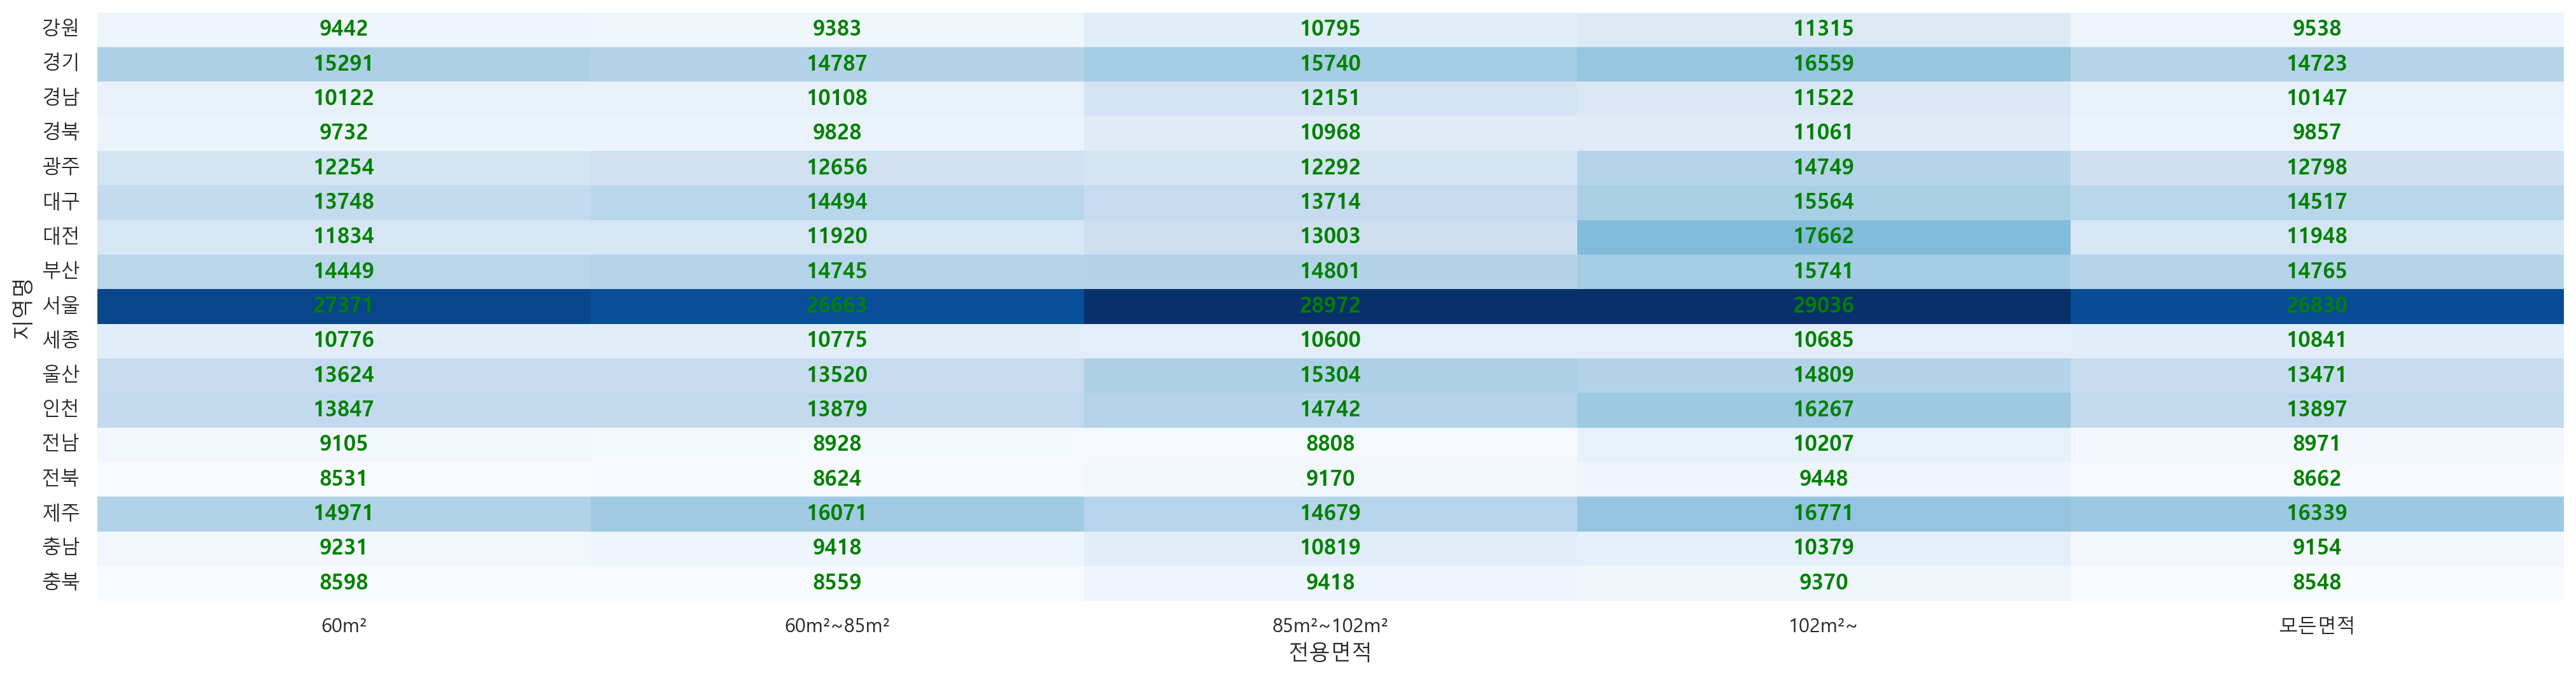

In [414]:
plt.figure(figsize=(25,6))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
           annot_kws={'color':'green','size':12, 'weight':'bold'}
           )
plt.show()

## (5) 연도, 지역별 평당분양가격(평균)

In [415]:
df_last.groupby(['연도', '지역명'])[['평당분양가격']].mean().unstack()

평당분양가격                                                       \
지역명             강원         경기            경남            경북            광주   
연도                                                                        
2015   7188.060000  11060.940   8459.220000   7464.160000   7916.700000   
2016   7162.903846  11684.970   8496.730000   7753.405000   9190.683333   
2017   7318.850000  12296.185   8806.600000   8288.063793   9599.700000   
2018   8219.255000  14258.420   9327.670000   8680.776923   9526.953333   
2019   8934.475000  15665.540  10697.615789   9050.250000  12111.675000   
2020  10302.423214  15106.080  10919.272222   9997.693750  13406.485714   
2021  10291.325000  14567.080  11302.335000  11227.150000  13709.850000   
2022  11644.215000  16621.550  12455.685000  12018.050000  15095.885106   
2023  13409.385000  20175.210  13283.182759  13025.320000  17957.852830   
2024  15622.282500  21532.500  13776.571875  14085.355263  18548.408108   

                                                                            \
지역명             대구            대전            부산            서울            세종   
연도                                                                           
2015   9018.900000   8190.600000  10377.400000  20315.680000   8765.020000   
2016  10282.030000   8910.733333  10743.535000  21753.435000   8857.805000   
2017  12191.972222   9912.910526  11637.615000  21864.095000   9132.945763   
2018  12139.252632  10234.106667  12889.965000  23202.245000  10340.463158   
2019  14081.650000  12619.200000  13537.865000  28286.830000  11299.394118   
2020  15314.200000  11238.844737  13353.010000  29781.015000  11628.100000   
2021  15586.285000  11994.216667  14317.655000  29380.450000  12578.060000   
2022  16821.915000  14113.880000  18166.835593  29128.531034  11309.971698   
2023  17656.747059  17917.288889  20470.850847  33230.560000  12278.200000   
2024  24102.283333  19881.922500  22900.267500  38981.827500  19115.800000   

                                                                            \
지역명             울산            인천            전남            전북            제주   
연도                                                                           
2015   9367.600000  10976.020000   6798.880000   7110.400000   7951.075000   
2016   9582.574138  11099.055000   6936.600000   6906.625000   9567.480000   
2017  10630.160870  11672.430000   7413.230000   7406.126316  12628.539623   
2018  10241.400000  11881.532143   7929.845000   8174.595000  11935.968000   
2019  10216.250000  13249.775000   8219.275862   8532.260000  11828.469231   
2020  12837.600000  14982.990000   9562.398214   8559.430000  14192.876923   
2021  14191.953061  15774.330000   9980.760000   9047.928814  22302.342857   
2022  17903.751724  17341.830000  10635.508475  10003.070000  18953.825000   
2023  18832.093220  16150.695000  11846.682692  10966.024528  24095.901923   
2024  17828.765625  21506.347500  13540.415625  12400.941667  25096.087500   

                                  
지역명             충남            충북  
연도                                
2015   7689.880000   6828.800000  
2016   7958.225000   7133.335000  
2017   8157.315517   7462.565000  
2018   8201.820000   8149.295000  
2019   8748.840000   7970.875000  
2020   9139.380000   8358.956897  
2021   9860.741379   8822.385000  
2022  11730.345000  10033.540000  
2023  12580.590000  11103.950000  
2024  12739.650000  12851.767500

In [416]:
df_last.pivot_table(index=['연도','지역명'],
                   values='평당분양가격').unstack()
r = df_last.pivot_table(index='연도',
                   columns='지역명',
                   values='평당분양가격')

In [417]:
r.loc[2024].head(1)

지역명
강원    15622.2825
Name: 2024, dtype: float64

In [418]:
r['제주'].head(1)

연도
2015    7951.075
Name: 제주, dtype: float64

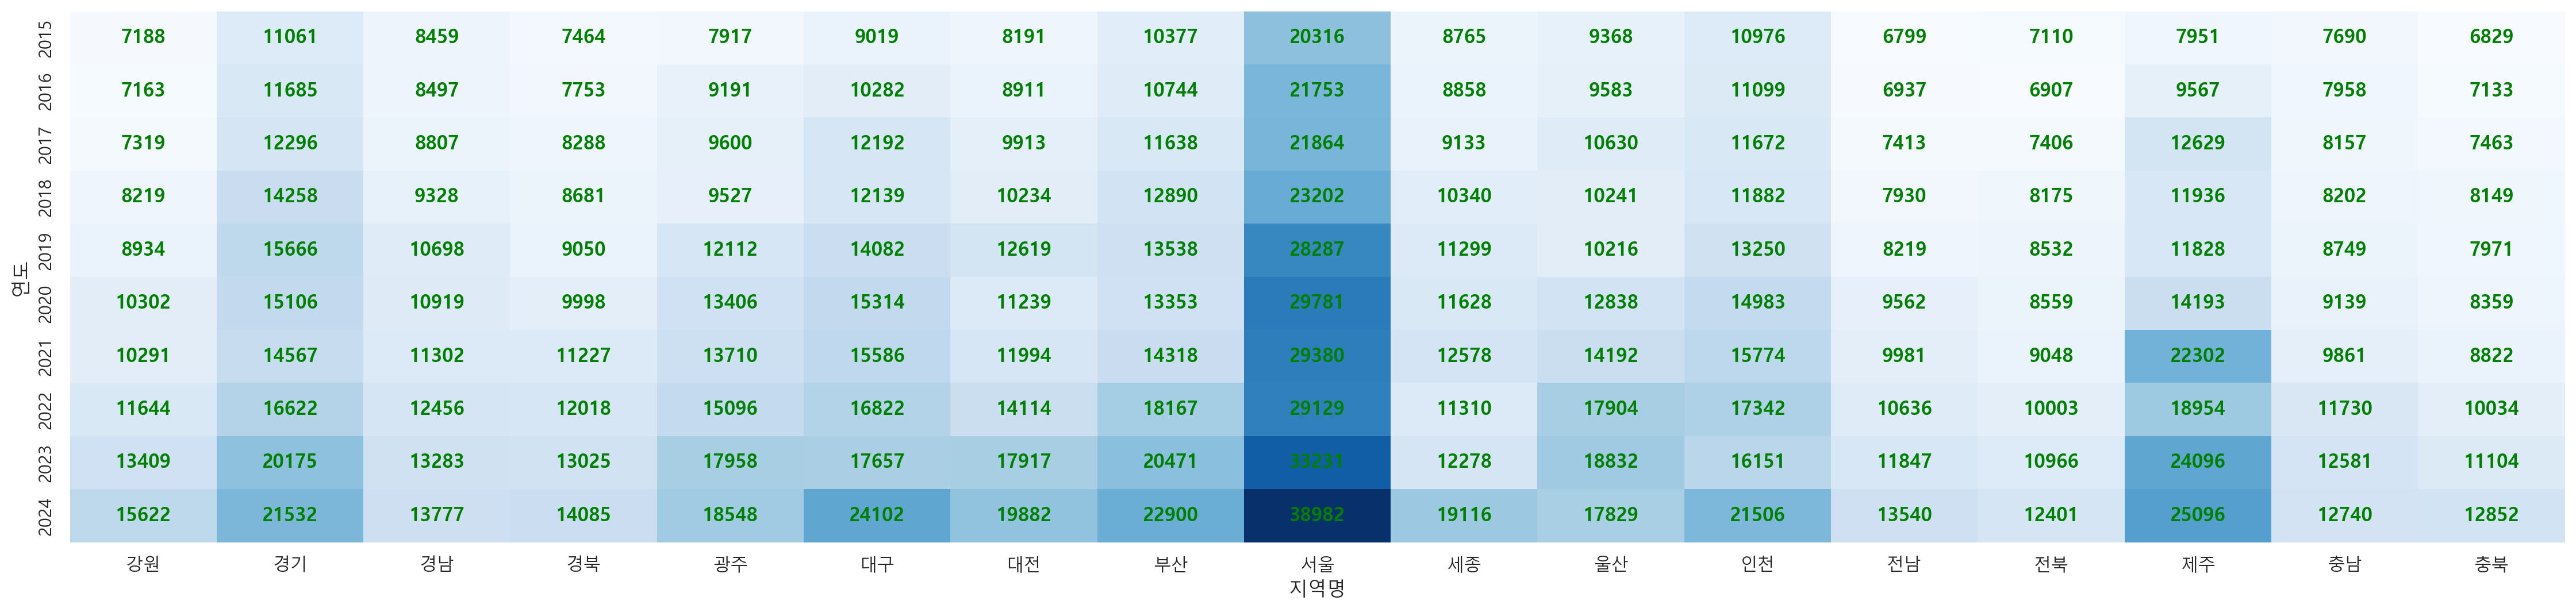

In [419]:
plt.figure(figsize=(28,6))
sns.heatmap(r, annot=True, fmt='.0f', cmap='Blues',
           annot_kws={'weight':'bold','color':'green'}, cbar=False)
plt.show()

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html (21Page)
- 생상이나 style 참조 : https://wikidocs.net/92085 (14page)

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

In [420]:
result = df_last.groupby('지역명')['평당분양가격'].count().sort_values()
result.min(), result.max()

(395, 535)

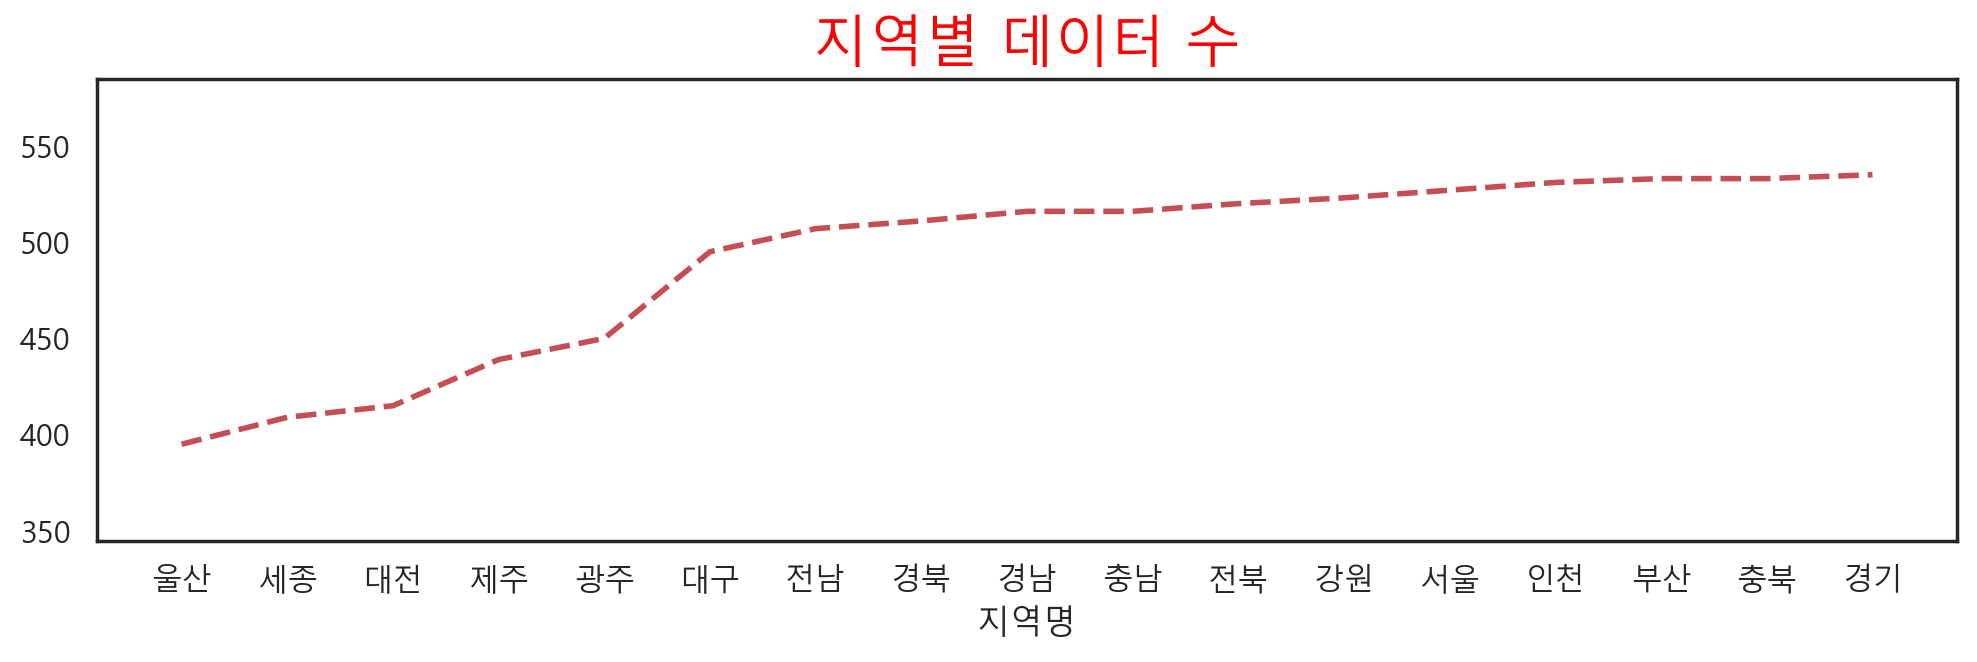

In [421]:
# result.plot.line()
ax = result.plot(kind='line', color='r', linestyle='--', linewidth=2,
           # title='지역별 데이터 수'
            ylim =[result.min()-50, result.max()+50]            
)  # default가 line
# plt.title('지역별 데이터 수', size=20, color='red')
ax.set_title('지역별 데이터 수', size=20, color='red')
ax.set_ylim([result.min()-50, result.max()+50])
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

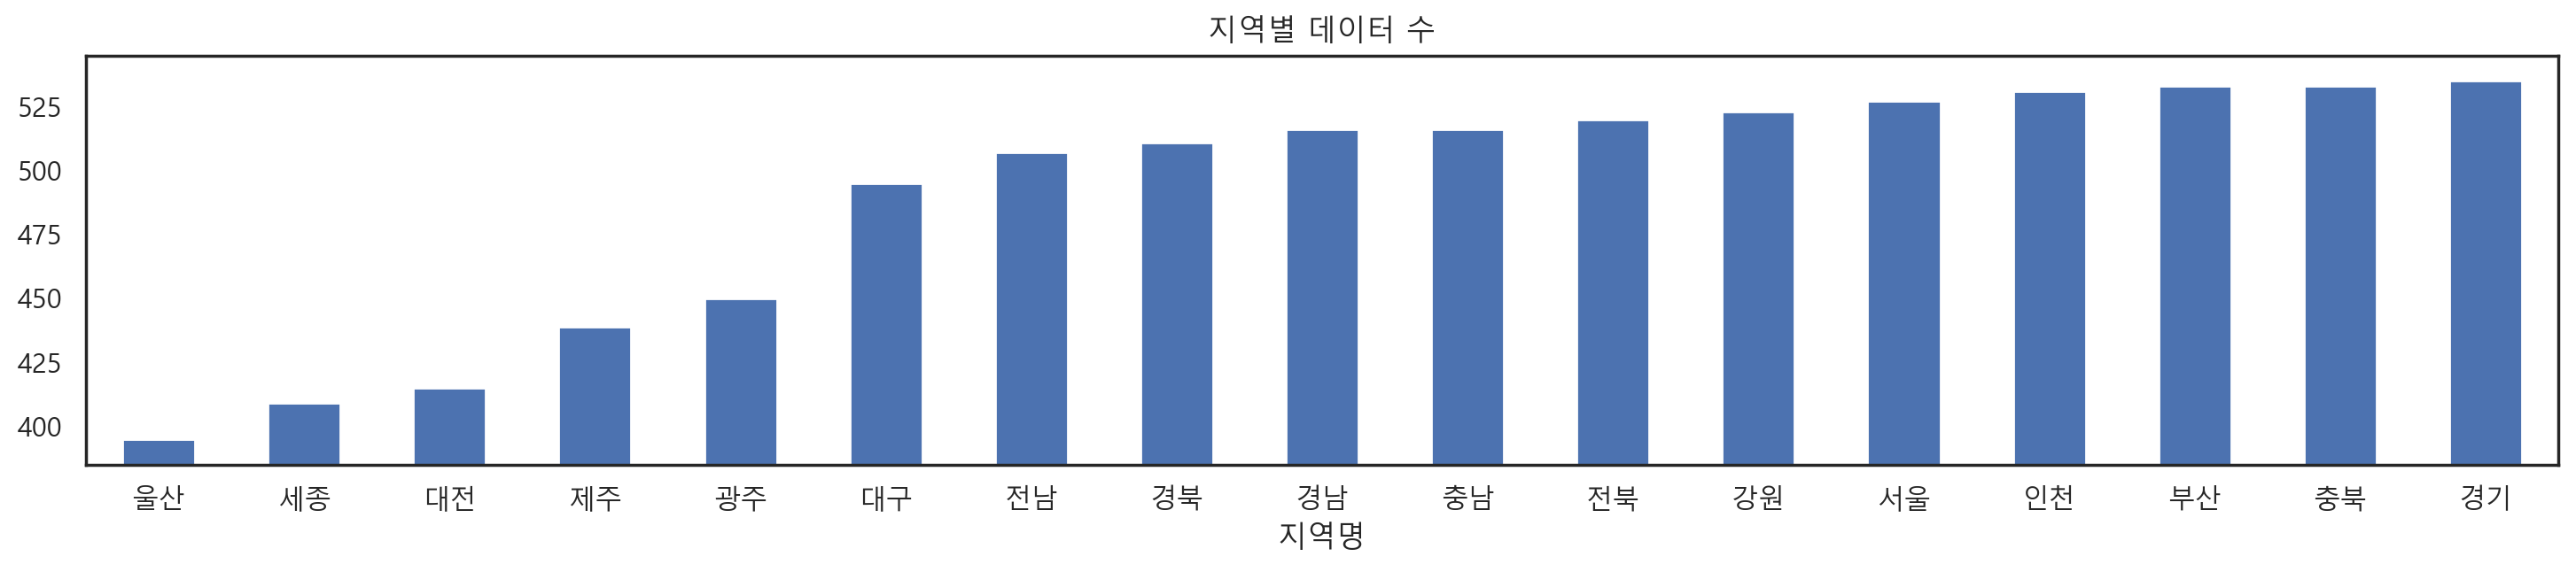

In [422]:
# 
result.plot(kind='bar', rot=0, figsize=(18,3),
           title='지역별 데이터 수',
          # ylim = [result.min()+50, result.max()+50]
           )
plt.ylim([result.min()-10, result.max()+10])
plt.show()

## (2) 지역별 평당분양가격 (line, bar)

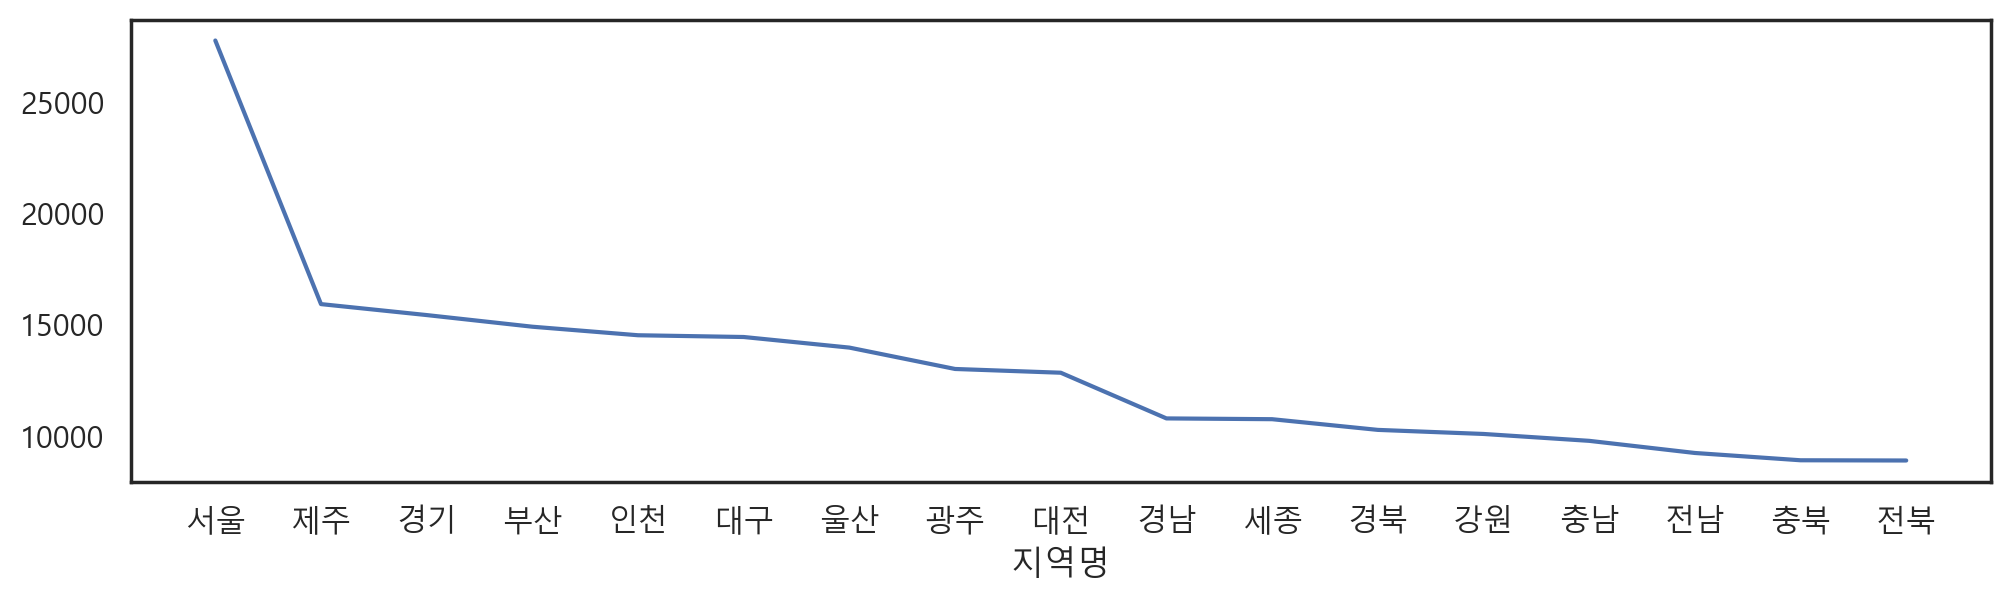

In [423]:
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(
    ascending=False
)
ax = result.plot(kind='line')
ax.set_xticks(range(len(result)))     
ax.set_xticklabels(result.index)
plt.show()                       

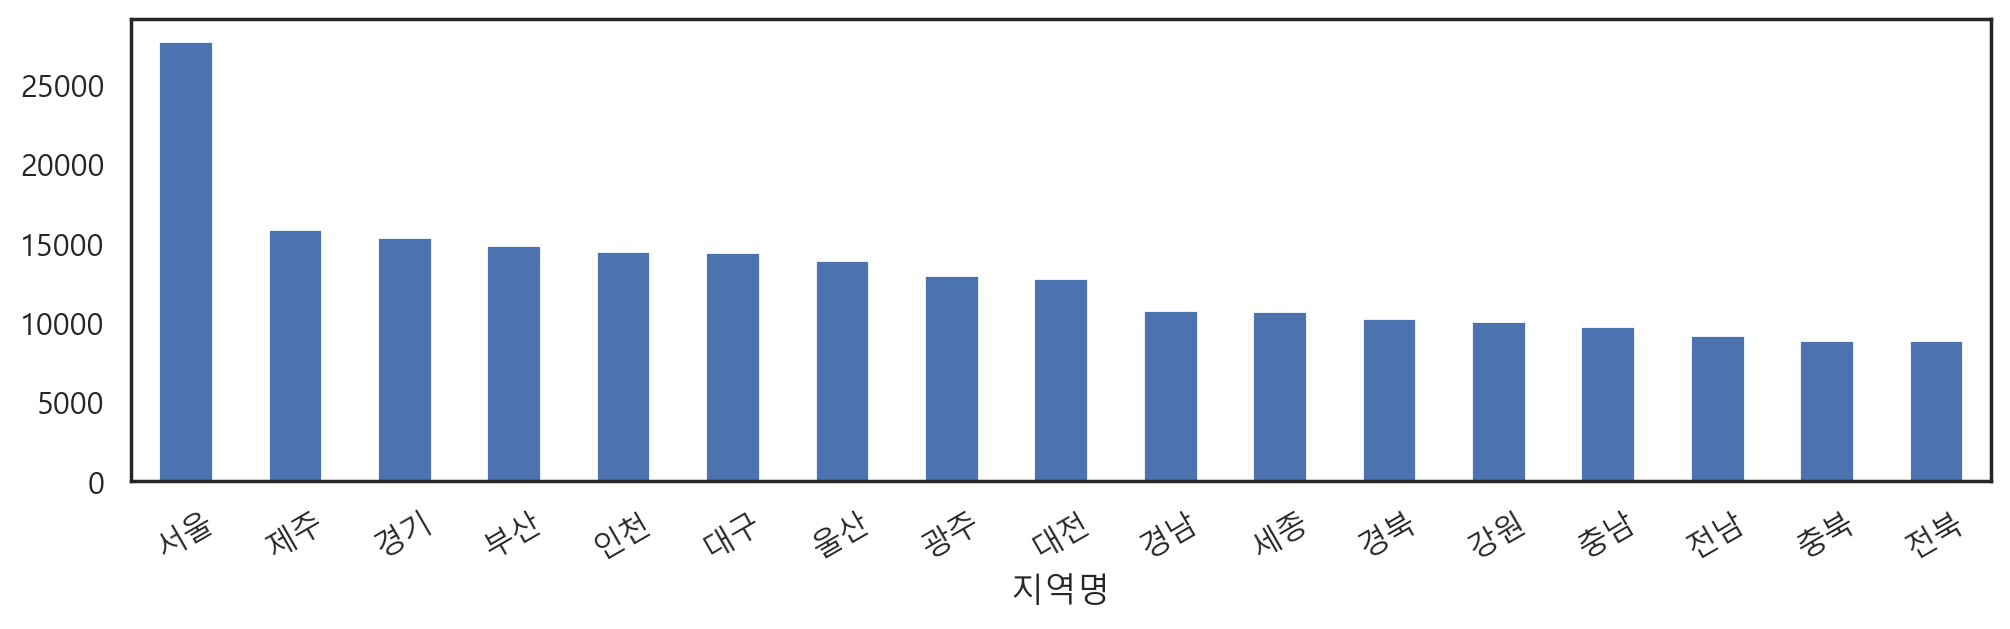

In [424]:
result.plot(kind='bar', rot=30)
plt.show()

## (3) 전용면적별 평당분양가격(barplot)

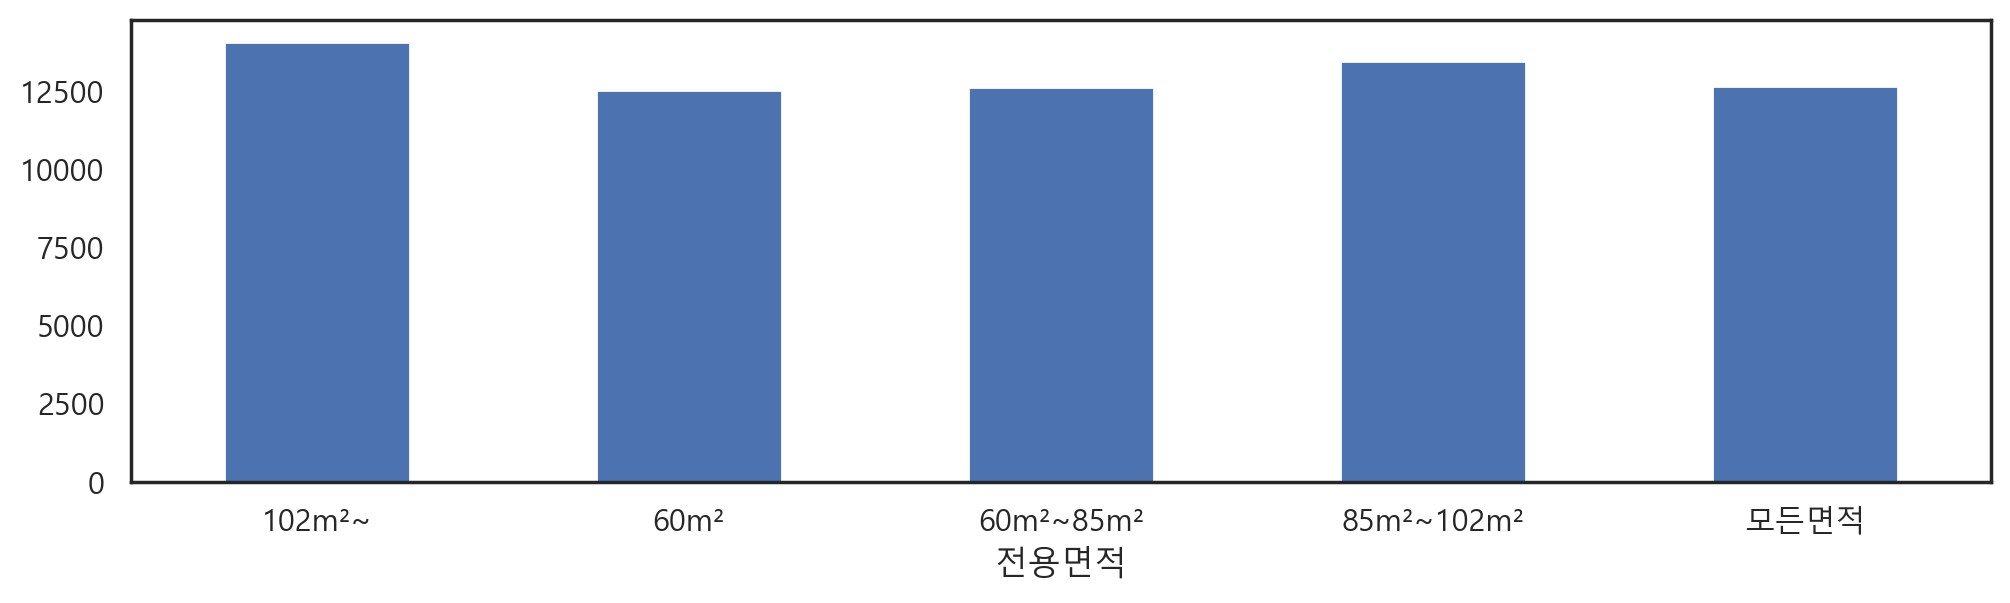

In [425]:
result = df_last.groupby('전용면적')['평당분양가격'].mean()
result.plot(kind='bar', rot=0)
plt.show()

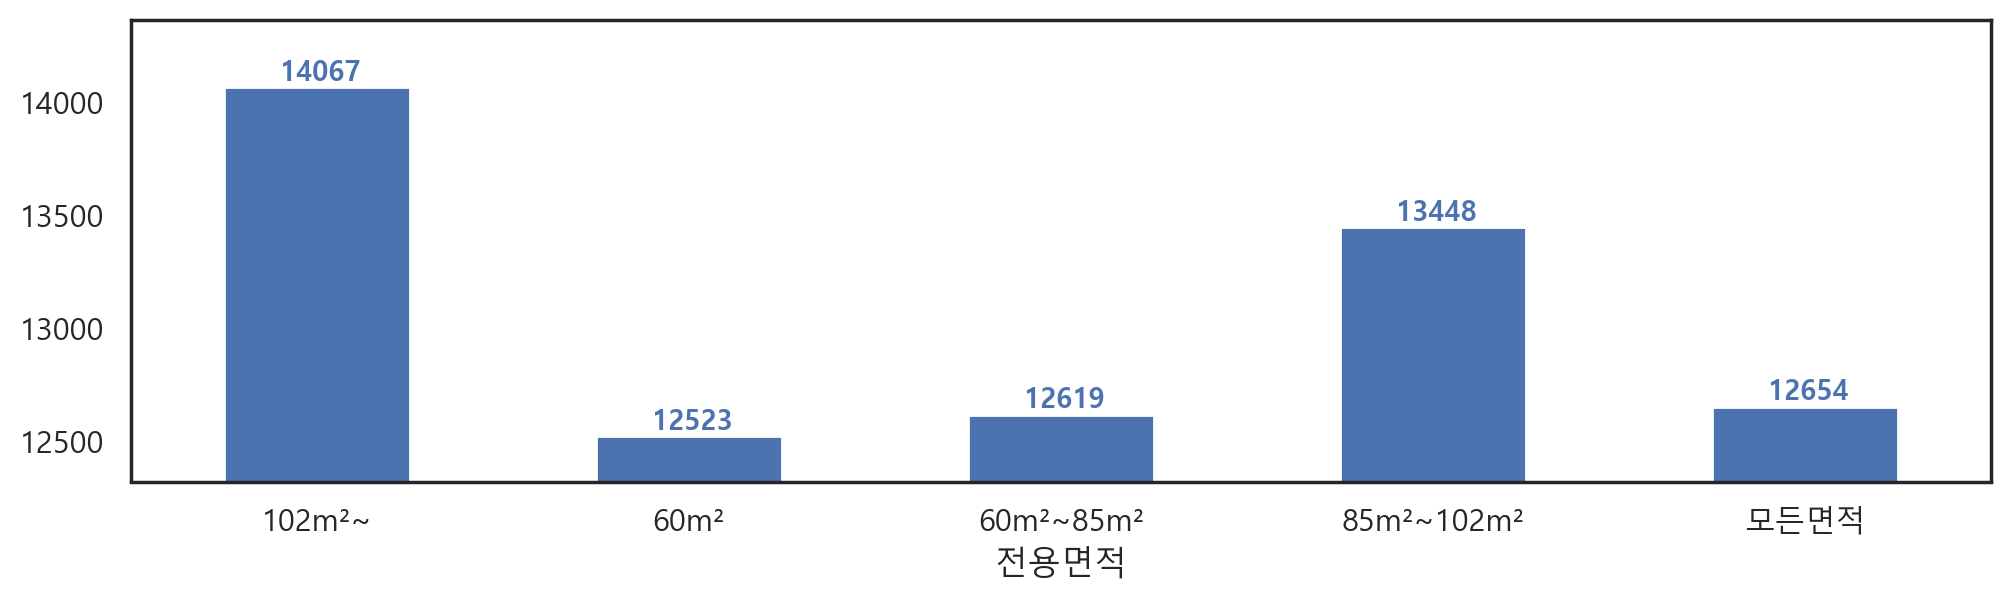

In [426]:
# 값의 차이가 많이 나 보이도록 y축값 범위조정
result.plot(kind='bar',rot=0,
           ylim = [result.min()-200, result.max()+300])
# plt.text(0-0.1, 14066+50, 14066)
# plt.text(1-0.1, 12522+50, 12522)
for i, val in enumerate(result):
    plt.text(i-0.1, val+30, round(val), color='b', fontsize=10, weight='bold')

plt.show()

In [302]:
for i, val in enumerate(result):
    print(i, val)

0 14066.826845637583
1 12522.77442680776
2 12619.048826815642
3 13447.67283519553
4 12654.068098159509


## (4) 연도별 평균 평당분양가격(line, bar)

In [427]:
result = df_last.groupby('연도')['평당분양가격'].mean()
print('result', result)
print('x축 : ', result.index)
print('y축 : ', [round(r,1) for r in result])   

result 연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16890.920657
2024    18962.919231
Name: 평당분양가격, dtype: float64
x축 :  Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int64', name='연도')
y축 :  [9202.7, 9683.0, 10372.9, 10978.9, 12188.3, 13039.4, 13636.0, 14942.5, 16890.9, 18962.9]


In [428]:
for key, val in result.items():
    print(key, val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105261
2020 13039.42244897959
2021 13636.022539682539
2022 14942.504494382021
2023 16890.92065677966
2024 18962.91923076923


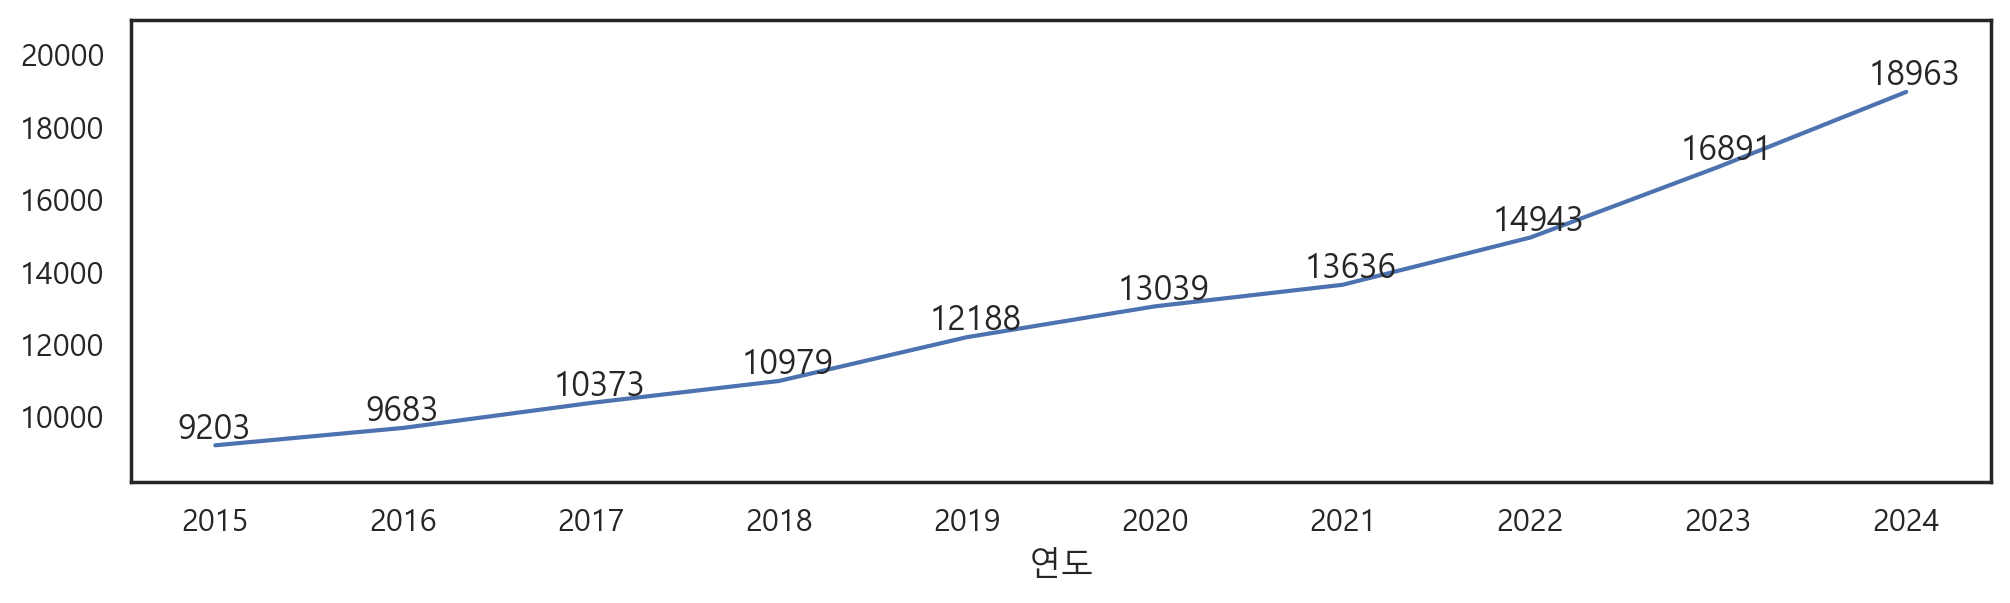

In [429]:
result.plot(kind='line', 
           xticks=range(2015, 2025),
           ylim = [result.min()-1000, result.max()+2000])
# plt.text(2015, 15000, '샘플')
for year, val in result.items():
    plt.text(year-0.2, val+200, round(val))

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

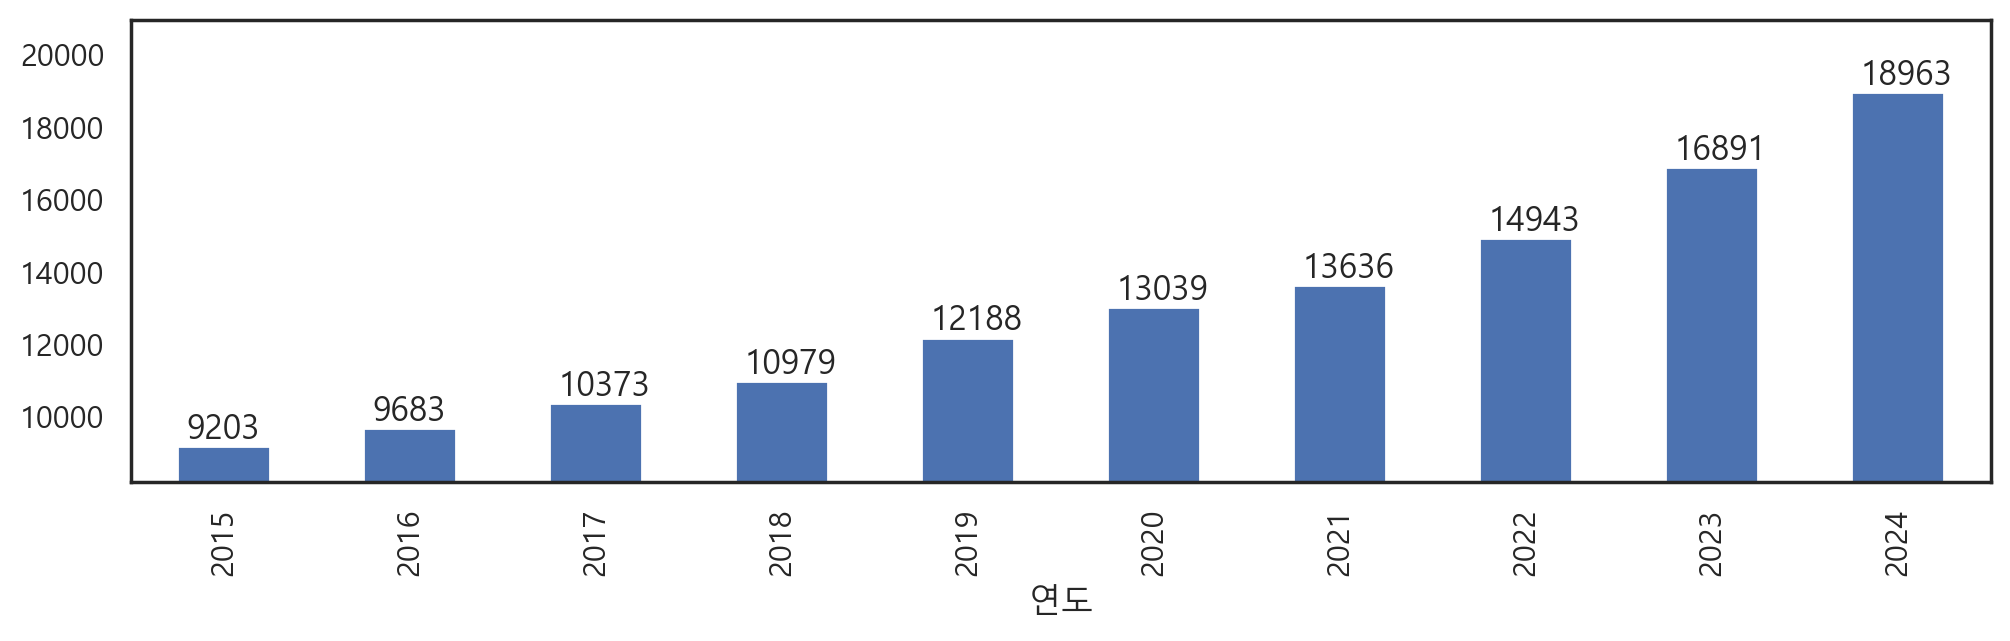

In [430]:
result.plot(kind='bar', 
           ylim = [result.min()-1000, result.max()+2000])
# plt.text(2015, 15000, '샘플')
for i, val in enumerate(result):
     plt.text(i-0.2, val+200, round(val))

In [431]:
# 연도와 평당분양가격의 상관관계
df_last[['연도','평당분양가격']].corr()

,연도,평당분양가격
연도,1.000000,0.472675
평당분양가격,0.472675,1.000000


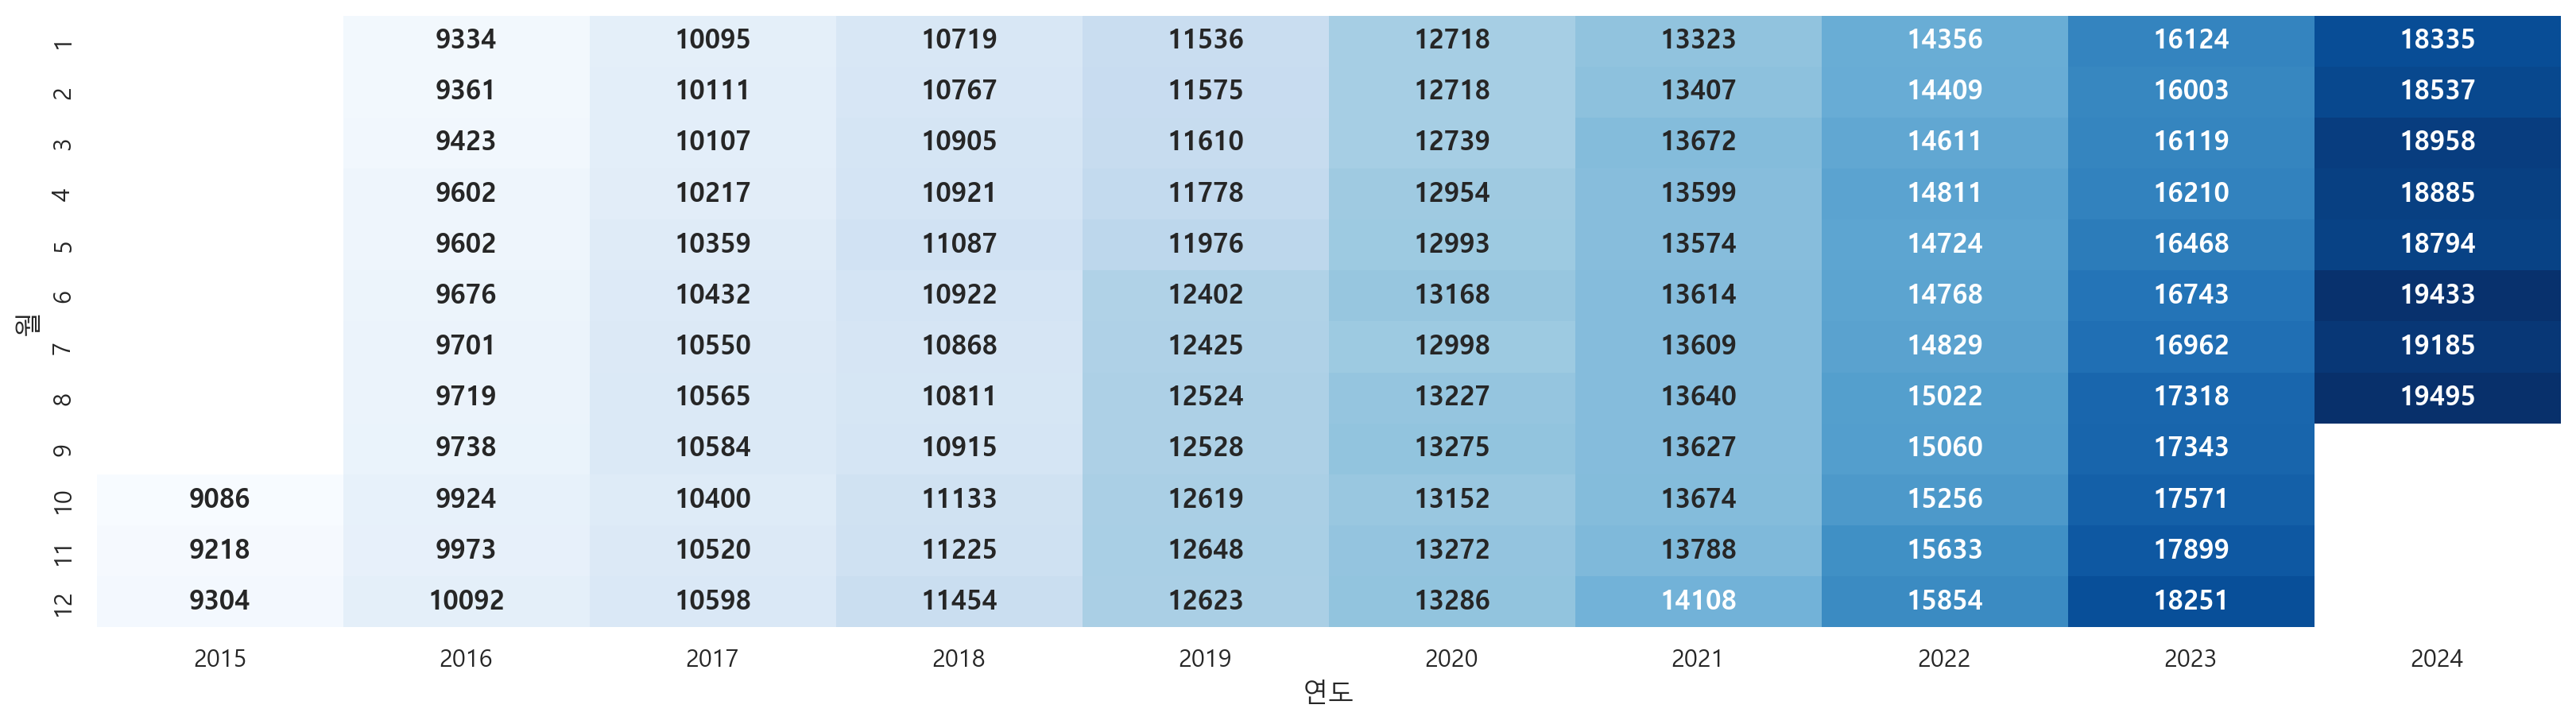

In [432]:
df_last.groupby(['월','연도'])['평당분양가격'].mean().unstack()
r = df_last.pivot_table(index='월',
                   columns='연도',
                   values='평당분양가격')
plt.figure(figsize=(20,5))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
           annot_kws={'weight':'bold','size':12})
plt.show()

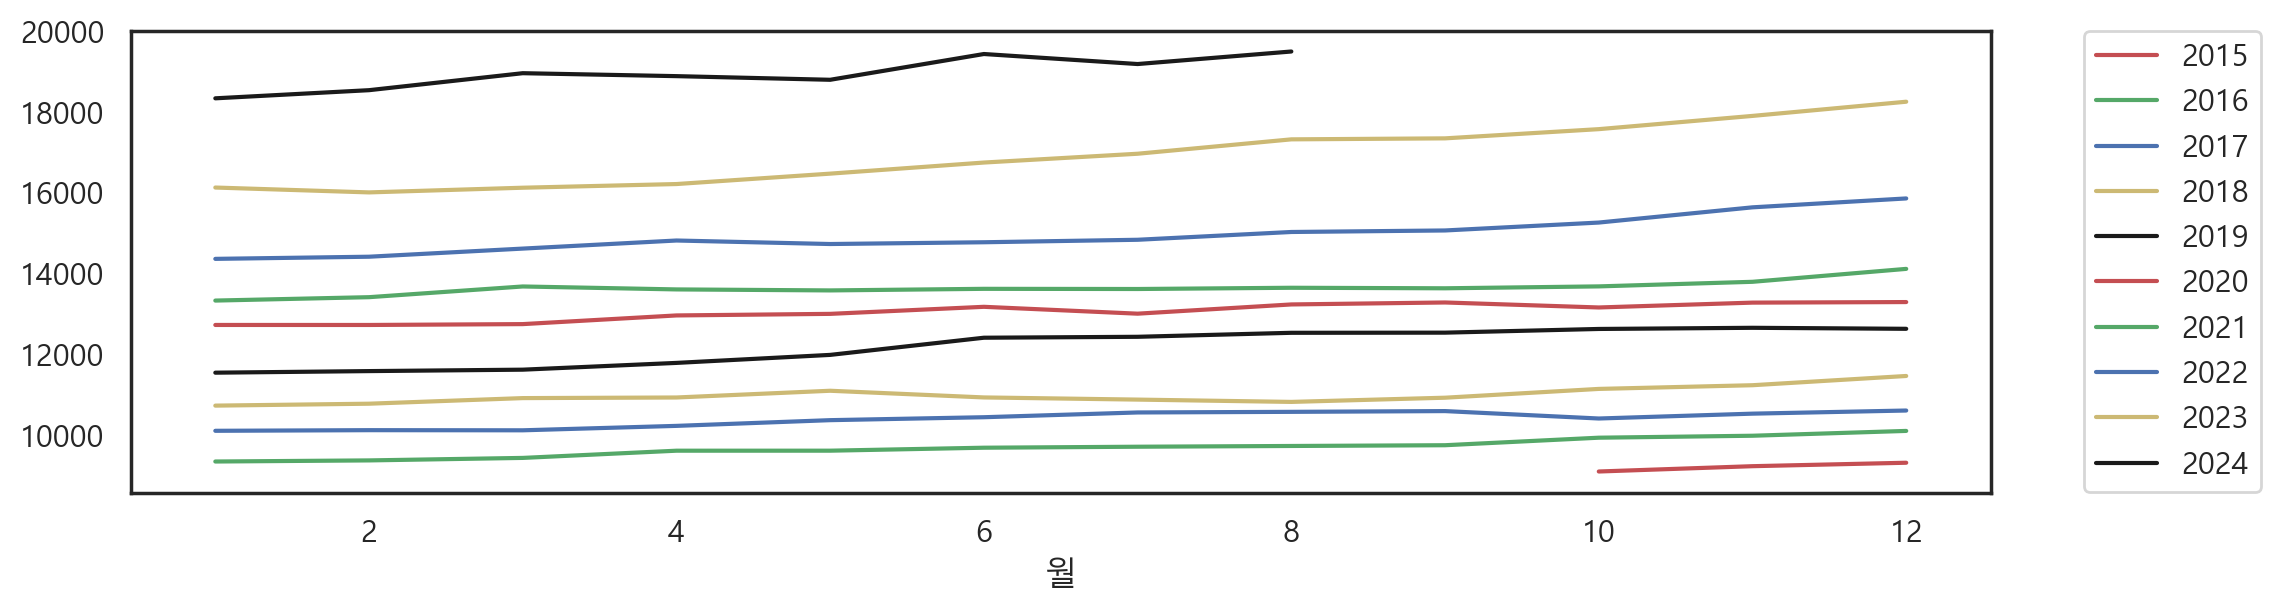

In [435]:
r.plot(#kind='line'
    color=['r','g','b','y','k']*2
    
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

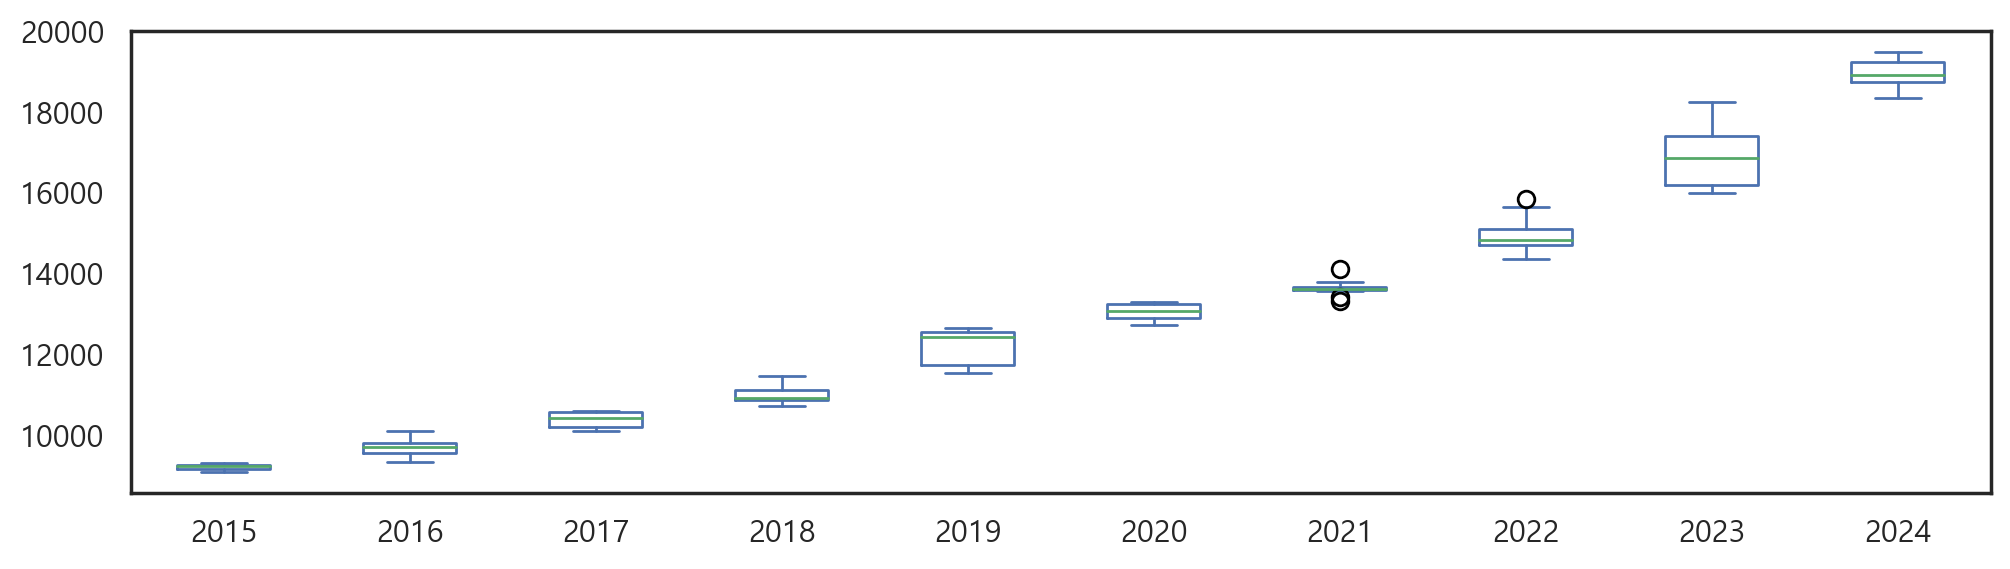

In [436]:
r.plot(kind='box')
plt.show()

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

## (1) 지역별 평당분양가격

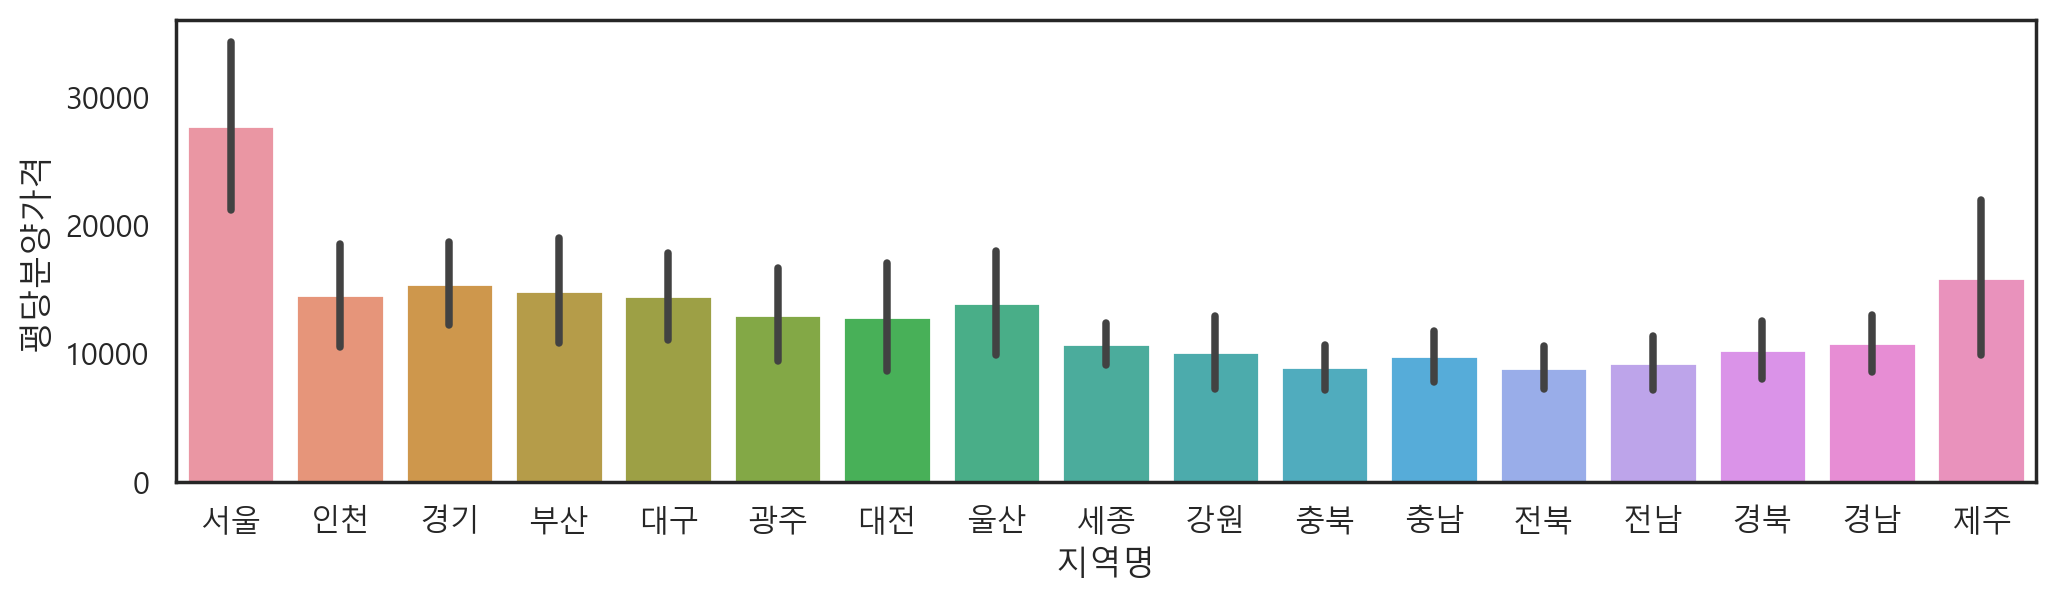

In [437]:
# seaborn은 자체적으로 그룹by 되어 있다.
sns.barplot(data=df_last, x='지역명', y='평당분양가격',
          # errorbar=None
          # errorbar=('ci', 95)   # 기본값(95% 신롸구간의 평균)
            errorbar='sd'       # 실제값과 표준편차
           )
plt.show()

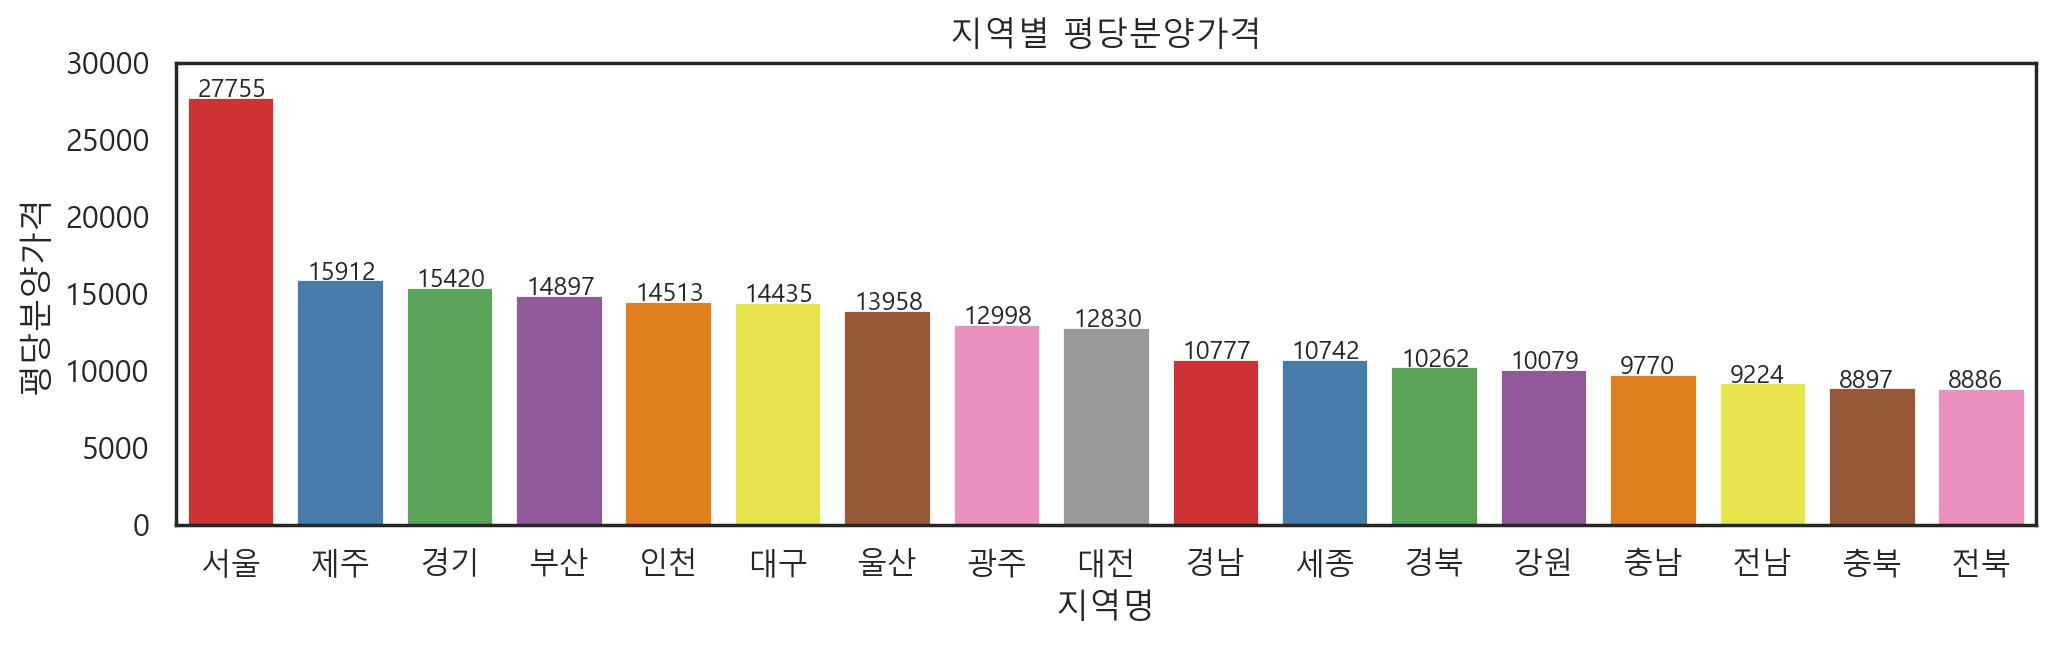

In [438]:
# 정렬된 순서로 시각화
result = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
ax = sns.barplot(data=df_last, x='지역명', y='평당분양가격',
            errorbar=None,
            order = result.index,
            palette='Set1'
           )
ax.set_title('지역별 평당분양가격')
ax.set_ylim([0, 30000])
# plt.title('지역별 평당분양가격')
for i, val in enumerate(result):
    ax.text(i-0.3, val, round(val), fontsize=9)
plt.show()

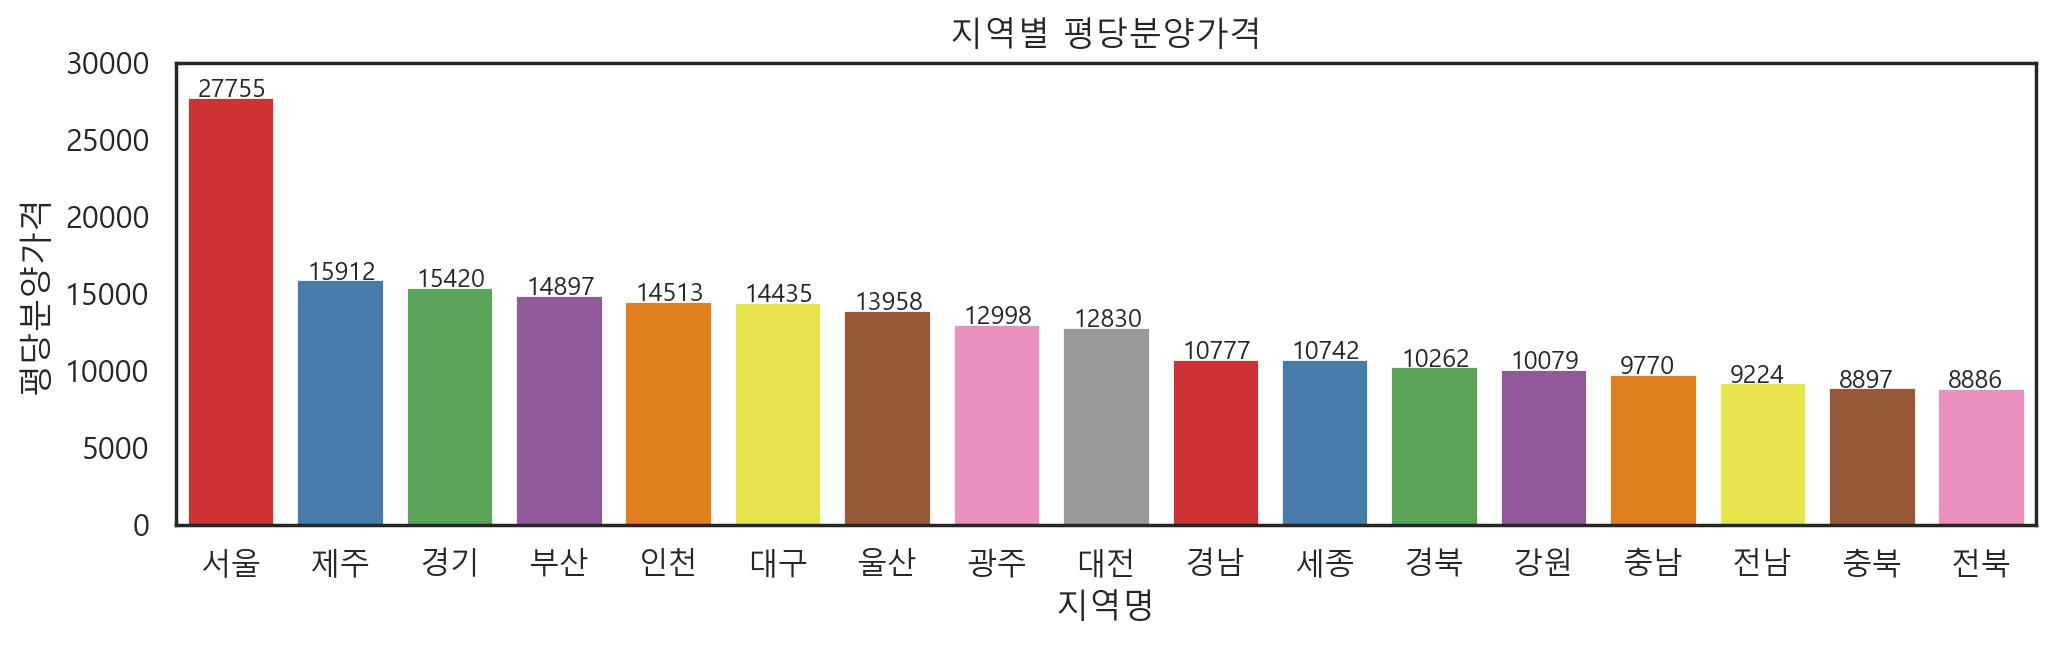

In [339]:
ax = sns.barplot(
            x=result.index, y=result,
            errorbar=None,
            order = result.index,
            palette='Set1'
           )
ax.set_title('지역별 평당분양가격')
ax.set_ylim([0, 30000])
# plt.title('지역별 평당분양가격')
for i, val in enumerate(result):
    ax.text(i-0.3, val, round(val), fontsize=9)
plt.show()

## (2) 연도별 평당분양가격

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
